### This notebook uses the encoded data from Sonia

In [1]:
from sklearn import datasets
from sklearn import model_selection  
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster
from sklearn import preprocessing
from sklearn import pipeline

import numpy as np
import pandas as pd
# Note: My latest version of Pandas is always showing a FutureWarning. Turning off Warnings for brevity:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import seaborn.objects as so

In [2]:
redfin = pd.read_csv('../3_data_cleaned/redfin_market_tracker_encoded.csv')
redfin = redfin.dropna()
print(redfin.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               1406 non-null   int64  
 1   median_sale_price                        1406 non-null   float64
 2   median_list_price                        1406 non-null   float64
 3   homes_sold                               1406 non-null   float64
 4   pending_sales                            1406 non-null   float64
 5   new_listings                             1406 non-null   float64
 6   inventory                                1406 non-null   float64
 7   months_of_supply                         1406 non-null   float64
 8   median_dom                               1406 non-null   float64
 9   avg_sale_to_list                         1406 non-null   float64
 10  sold_above_list                          1406 no

In [3]:
# Prepare data for regression
X = redfin[['median_list_price', "interest_rate","region_Nassau County, NY","region_Suffolk County, NY","property_type_All Residential","property_type_Condo/Co-op","property_type_Multi-Family (2-4 Unit)","property_type_Single Family Residential","property_type_Townhouse","period_begin"]]
y = redfin['median_sale_price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.7)

In [4]:
regressor = linear_model.LinearRegression()

# Fit the regressor
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

In [5]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# append result to Redfin
redfin['predicted_median_sale_price_simple_linear'] = regressor.predict(X)
print(result.head(10))
# Calculate performance metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R-squared:', metrics.r2_score(y_test, y_pred))

         Actual      Predicted
41     375000.0  386051.550370
195    291000.0  251623.059427
53     675000.0  625255.262430
1373   725000.0  683608.480213
1104   499750.0  466837.509511
162    296000.0  279640.007154
899    402500.0  383501.932336
1384  1175000.0  663139.336589
780    339000.0  340269.670548
997    297750.0  294206.449411
Mean Absolute Error: 50958.78372712323
R-squared: 0.6409279715778098


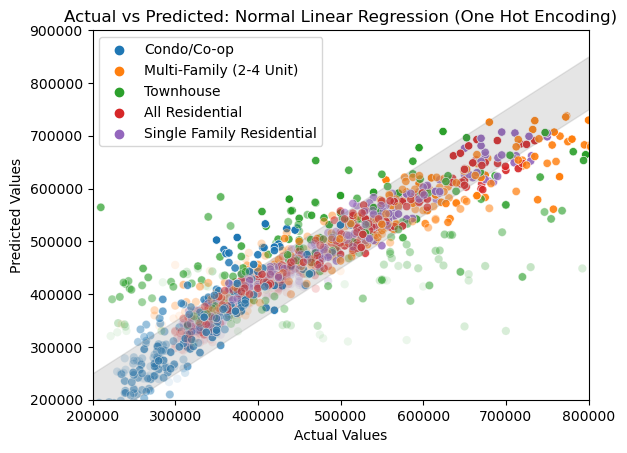

In [6]:
#Seaborn plot
from plot_redfin import plotRedfinScatter
plot = plotRedfinScatter('median_sale_price', 'predicted_median_sale_price_simple_linear', redfin)
plot.set(xlabel='Actual Values', ylabel='Predicted Values', title='Actual vs Predicted: Normal Linear Regression (One Hot Encoding)')
plot.fill_between([200000, 800000], [150000, 750000], [250000, 850000],  color='gray', alpha=0.2)

In [7]:
# Let's try a different regression model
regressor = tree.DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
redfin['predicted_median_sale_price_decision_tree'] = regressor.predict(X)
print(result.head(10))

# Calculate performance metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R-squared:', metrics.r2_score(y_test, y_pred))

         Actual  Predicted
41     375000.0   348000.0
195    291000.0   294500.0
53     675000.0   765000.0
1373   725000.0   750000.0
1104   499750.0   505000.0
162    296000.0   285000.0
899    402500.0   300000.0
1384  1175000.0   705000.0
780    339000.0   335000.0
997    297750.0   309500.0
Mean Absolute Error: 61919.626395939085
R-squared: 0.5139132664100154


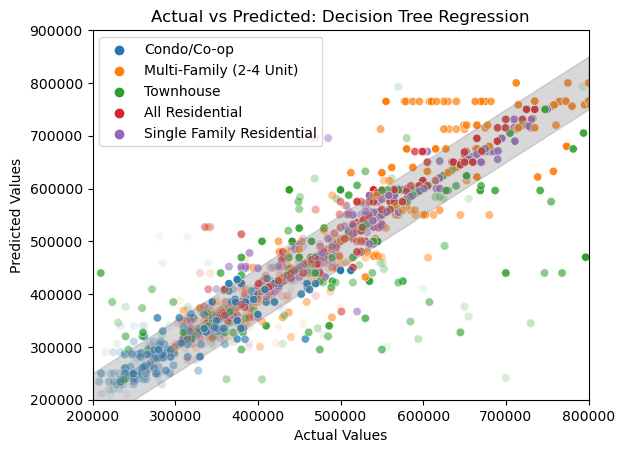

In [8]:
plot = plotRedfinScatter('median_sale_price', 'predicted_median_sale_price_decision_tree', redfin)
plot.set(xlabel='Actual Values', ylabel='Predicted Values', title='Actual vs Predicted: Decision Tree Regression')
plot.fill_between([200000, 800000], [150000, 750000], [250000, 850000],  color='gray', alpha=0.3)

In [9]:
# Let's try a different regression model
regressor = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.PoissonRegressor())
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
redfin['predicted_median_sale_price_ridge_regressor'] = regressor.predict(X)
print(result.head(10))

# Calculate performance metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R-squared:', metrics.r2_score(y_test, y_pred))

         Actual      Predicted
41     375000.0  386186.083445
195    291000.0  274381.457637
53     675000.0  620148.189818
1373   725000.0  717264.841203
1104   499750.0  464230.950375
162    296000.0  288878.625265
899    402500.0  377929.685927
1384  1175000.0  694500.090341
780    339000.0  339888.860954
997    297750.0  295961.905761
Mean Absolute Error: 44884.03659379316
R-squared: 0.6743529527580985


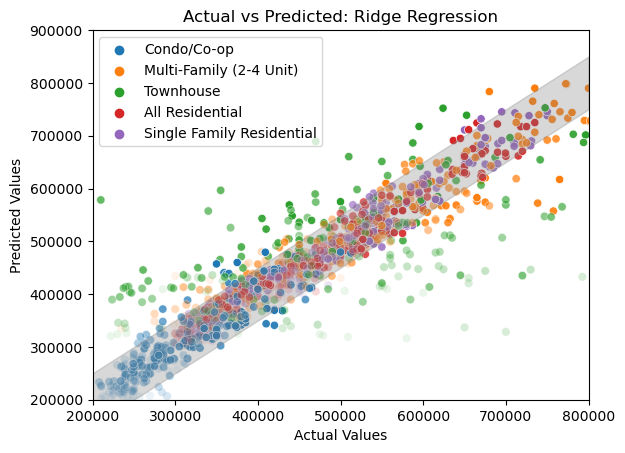

In [10]:
plot = plotRedfinScatter('median_sale_price', 'predicted_median_sale_price_ridge_regressor', redfin)
plot.set(xlabel='Actual Values', ylabel='Predicted Values', title='Actual vs Predicted: Ridge Regression')
plot.fill_between([200000, 800000], [150000, 750000], [250000, 850000],  color='gray', alpha=0.3)